# LDA

## Importing the dataset

In [1]:
dataset = read.csv('Wine.csv')
head(dataset)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


## Splitting the dataset into the Training set and Test set

In [2]:
library(caTools)
set.seed(123)

split = sample.split(dataset$Customer_Segment, SplitRatio=0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

## Feature Scaling

In [4]:
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])

In [5]:
head(training_set)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,1.5207582,-0.55639963,0.2357917,-1.0905953,1.88706849,0.8113772,1.0287334,-0.6783993,1.2020748,0.26175076,0.3765715,1.8639715,1.066096,1
2,0.2326757,-0.49235827,-0.8060433,-2.3498893,0.03193501,0.5690562,0.7307323,-0.8411235,-0.5783814,-0.27972739,0.4197159,1.1205576,1.016522,1
3,0.1826530,0.03827019,1.0980000,-0.2319858,0.10064365,0.8113772,1.2075341,-0.5156752,2.1187453,0.27894054,0.3334272,0.7917399,1.462687,1
6,1.4832413,-0.51065580,0.3076424,-1.2050766,0.85643878,1.5706496,1.3565347,-0.1902268,0.6379699,0.73876722,0.4197159,0.3342544,2.338493,1
7,1.7208487,-0.41001937,0.3076424,-1.3767985,-0.24289959,0.3267352,0.4923314,-0.5156752,0.6555982,0.09415038,0.2902828,1.3778932,1.809705,1
9,2.2710976,-0.62044100,-0.6982673,-1.5485204,-0.17419094,0.8113772,0.9492665,-0.5970372,0.6555982,0.07266315,0.5491491,0.3342544,0.999997,1


## Applying LDA

In [6]:
library(MASS)

lda = lda(formula = Customer_Segment ~ ., data=training_set)
training_set = as.data.frame(predict(lda, training_set))
training_set = training_set[c(5, 6, 1)]
test_set = as.data.frame(predict(lda, test_set))
test_set = test_set[c(5, 6, 1)]

In [7]:
head(training_set)

,x.LD1,x.LD2,class
1,-4.656187,2.081444,1
2,-4.336729,1.267238,1
3,-3.292202,1.167575,1
6,-4.515987,3.265418,1
7,-4.627289,3.369602,1
9,-3.936469,1.967177,1


## Fitting SVM to the Training set

In [8]:
library(e1071)

classifier = svm(formula=class ~ .,
                 data=training_set,
                 type='C-classification',
                 kernel='linear')
classifier

Warning message:
"package 'e1071' was built under R version 3.6.3"


Call:
svm(formula = class ~ ., data = training_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  19


## Predicting the Test set results

In [10]:
y_pred = predict(classifier, newdata=test_set[-3])
head(data.frame(y_test=test_set[3], y_pred=y_pred))

,class,y_pred
4,1,1
5,1,1
8,1,1
11,1,1
16,1,1
20,1,1


## Making the Confusion Matrix

In [11]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     1  2  3
  1 12  0  0
  2  1 13  0
  3  0  0 10

## Visualising the Training set results

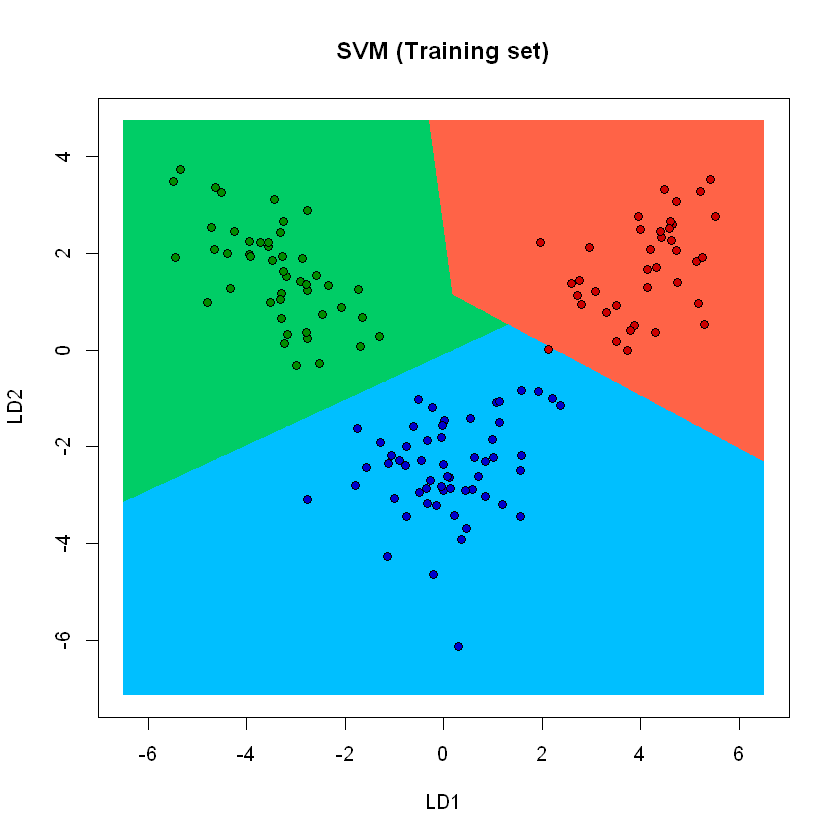

In [13]:
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by=0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by=0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid=predict(classifier, newdata=grid_set)

plot(set[, -3],
     main='SVM (Training set)',
     xlab='LD1', ylab='LD2',
     xlim=range(X1), ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch=21, bg=ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## Visualising the Test set results

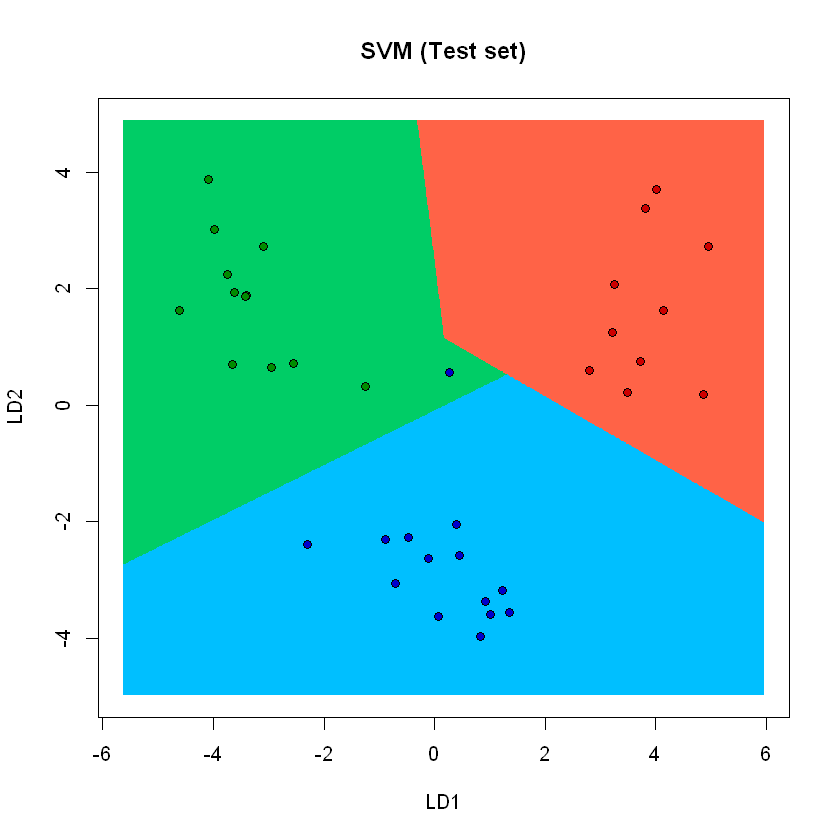

In [14]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by=0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by=0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid=predict(classifier, newdata=grid_set)

plot(set[, -3], main='SVM (Test set)',
     xlab='LD1', ylab='LD2',
     xlim=range(X1), ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch=21, bg=ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))